In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import json
import datetime

In [4]:
post_df_full = pd.read_excel("Data/warriors_clean.xlsx")

In [5]:
post_df_full1=post_df_full
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
# Merge cột vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"""He's a true hooper, so obviously he's going t...",401.0,319.0,NaN,2.0,NaN,NaN,11.0,13,18,733
1,In-Season Tournament matchup against the Kings...,1311.0,975.0,1.0,5.0,1.0,NaN,36.0,38,38,2329
2,"The Dubs have 44 dunks so far this season, res...",891.0,475.0,1.0,6.0,NaN,NaN,11.0,20,24,1384
3,Play that back one time ▶️\n\nVerizon || Plays...,2902.0,1709.0,5.0,25.0,NaN,2.0,50.0,57,32,4693
4,"""Yes, sir. Yes, sir. Yes, sir!""\n\nStephen Cur...",2062.0,1733.0,25.0,3.0,NaN,1.0,40.0,120,59,3864
...,...,...,...,...,...,...,...,...,...,...,...
115,Career-high points for the rook before the half,13881.0,10085.0,19.0,31.0,2.0,2.0,194.0,292,300,24214
116,"Behind-the-back to the rack\nthat's nice, Dari...",2590.0,1418.0,NaN,11.0,NaN,1.0,33.0,59,59,4053
117,12 points in 12 minutes\nBrandin' is BALLING\n...,2240.0,1428.0,1.0,7.0,NaN,1.0,39.0,81,70,3716
118,Tough bucket,6821.0,4525.0,23.0,24.0,3.0,3.0,74.0,139,172,11473


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


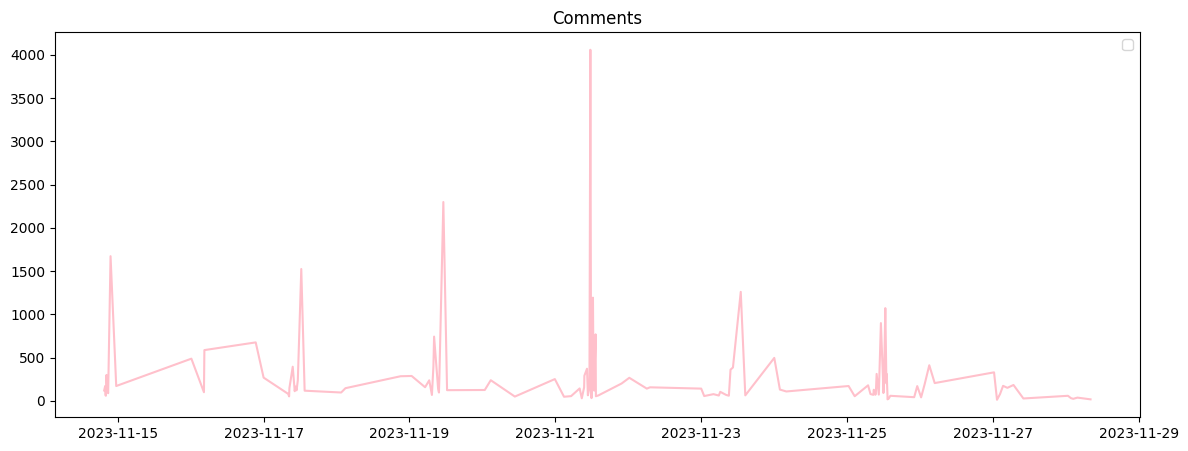

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], color= 'pink')
ax.set_title("Comments")
ax.legend()
plt.show()

In [30]:
max_reaction_post = post_df_full.loc[post_df_full['comments'].idxmax()]
max_reaction_post

Unnamed: 0                                                                      67
post_id                                                           1036325667858344
text                                                      Klay’s Pumpfake is TOUGH
post_text                                                 Klay’s Pumpfake is TOUGH
time                                                           2023-11-21 11:31:24
image                                                                      unknown
image_lowquality                 https://scontent.fhan14-3.fna.fbcdn.net/v/t15....
images                                                                          []
images_description                                                              []
images_lowquality                ['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...
images_lowquality_description                                               [None]
video                            https://scontent.fhan14-3.fna.fbcdn.net/v/t42....
vide

In [31]:
max_reaction_post = post_df_full.loc[post_df_full['reaction_count'].idxmin()]
max_reaction_post

Unnamed: 0                                                                       0
post_id                                                           1041169967373914
text                             "He's a true hooper, so obviously he's going t...
post_text                        "He's a true hooper, so obviously he's going t...
time                                                           2023-11-28 08:06:42
image                                                                      unknown
image_lowquality                 https://scontent.fhan14-3.fna.fbcdn.net/v/t15....
images                                                                          []
images_description                                                              []
images_lowquality                ['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...
images_lowquality_description                                               [None]
video                            https://scontent.fhan14-3.fna.fbcdn.net/v/t42....
vide

### Tạo một dataframe mới để chứa các comments

In [6]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [32]:
def createCommentsFrame(df):
    df_result = {"comment_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "comment_reactions" : [],
                   "post_id" : [],"commenter_id" :[],
                   "commenter_name" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['comment_reactions'].append(comment['comment_reactions'])
                df_result['post_id'].append(rows.post_id)
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['commenter_name'].append(comment['commenter_name'])
            except:
                continue
    return pd.DataFrame(df_result)

In [33]:
df_comment = createCommentsFrame(post_df_full)
df_comment

,comment_id,comment_text,comment_time,comment_reactions,post_id,commenter_id,commenter_name
0,342658758366487,Love Gary.,2023-11-05,None,1041169967373914,1490982998,Rose Bahrns
1,367970795590373,"May be a baller on the court🔥⛹🏽‍♂️, but also a...",2023-11-05,None,1041169967373914,100012905610817,Collin Kilangwa
2,1686995581799204,💗,2023-11-06,None,1041169967373914,100007190149508,Reysh Jay Palestroque
3,1553759638716832,Imma do this once sending 5 grand to the first...,2023-11-06,None,1041169967373914,100045975607076,Stephen Bankz Fx
4,356226680286622,It's good you don't allow this opportunity for...,2023-11-04,None,1041169967373914,100075743319236,Daniel Angel
...,...,...,...,...,...,...,...
1778,7048840848564809,Estilo imbatível com o Conjunto Regata e Short...,2023-11-14,None,1032626498228261,100069145819435,Legendary Store
1779,364554516032005,Odhell Tolentino Camacho pasok taga pook🤣😜😜,2023-11-14,None,1032626498228261,100026928961983,Aguba Elvin
1780,714539677235507,Ban Draymond green to NBA,2023-11-14,None,1032626498228261,100086930986530,Cassian Ahren
1781,712569504102681,Tap out by green HAHAHA,2023-11-14,None,1032626498228261,61552306410406,Christopher Rojo


Người dùng có lượng comment nhiều nhất

In [24]:
commenter_counts = pd.Series(df_comment['commenter_name']).value_counts()
max_commenter_name = commenter_counts.index[0]
max_commenter_frequency = commenter_counts.iloc[0]
id_most = df_comment[df_comment['commenter_name'] == max_commenter_name]['commentor_id'].iloc[0]
print("Commenter with the highest number of comments:")
print("Name:", max_commenter_name)
print("Frequency:", max_commenter_frequency)
print("ID:", id_most)

Commenter with the highest number of comments:
Name: Ronger Hexter
Frequency: 23
ID: 61551554446417


### Tìm keyword trong các comment

In [ ]:
text=""
for i in df_comment['comment_text']:
  text=text+i+" . "
text

'Love Gary. . May be a baller on the court🔥⛹🏽\u200d♂️, but also a good gamer. . 💗 . Imma do this once sending 5 grand to the first “8” People to hmu with “BLESSED” Cus i feel some people Going Though “DIFFICULTIES, Y’all stay Blessed . It\'s good you don\'t allow this opportunity for SUCCESS slip off. Mrs Rosita D. Torres Fx exceptional work makes a lot of people financially breakthroughs, to help others deserves good recommendation.\n\nConnect to her via\n👇👇👇👇👇👇👇👇👇👇\nhttps://\nwww.facebook.com\n/RositaD.Torres . GO GOOOO BEST TEAAMM✨ . Go WARRIORS 💪💪💪 . Let’s go Warriors! We are rooting for you guys all the way ! Welcome back Draymond! Pls. Just play safe, wisely & not putting your teammates in jeopardy! Thank you ❤️❤️🙏 . Gudluck for tomorrow 😊 . 💙💛❤️❤️❤️ . Go Warriors I hope you win . See you tomorrow 😁 . 😍😍😍 . Let\'s go Warriors . 𝗜𝘁’𝘀 𝗮𝗺𝗮𝘇𝗶𝗻𝗴 𝘁𝗿𝗮𝗱𝗶𝗻𝗴 𝘄𝗶𝘁𝗵 𝘀𝗼𝗺𝗲𝗼𝗻𝗲 𝘄𝗶𝘁𝗵 𝗴𝗿𝗲𝗮𝘁 𝘀𝗸𝗶𝗹𝗹 𝗮𝗻𝗱 𝗸𝗻𝗼𝘄𝗹𝗲𝗱𝗴𝗲 𝗮𝗯𝗼𝘂𝘁 𝘁𝗵𝗲 𝗺𝗮𝗿𝗸𝗲𝘁, 𝗶 𝗲𝗻𝗷𝗼𝘆 𝗳𝘂𝗹𝗹 𝗽𝗿𝗼𝗳𝗶𝘁 𝗮𝗻𝗱 𝗲𝗮𝘀𝘆 𝘄𝗶𝘁𝗵𝗱𝗿𝗮𝘄𝗮𝗹\n!!!!!!!!!!!!!!!\n!!!!!!!!!!!!!

In [ ]:
text_fix=text 
print(len(text))
text

153517


'Love Gary. . May be a baller on the court🔥⛹🏽\u200d♂️, but also a good gamer. . 💗 . Imma do this once sending 5 grand to the first “8” People to hmu with “BLESSED” Cus i feel some people Going Though “DIFFICULTIES, Y’all stay Blessed . It\'s good you don\'t allow this opportunity for SUCCESS slip off. Mrs Rosita D. Torres Fx exceptional work makes a lot of people financially breakthroughs, to help others deserves good recommendation.\n\nConnect to her via\n👇👇👇👇👇👇👇👇👇👇\nhttps://\nwww.facebook.com\n/RositaD.Torres . GO GOOOO BEST TEAAMM✨ . Go WARRIORS 💪💪💪 . Let’s go Warriors! We are rooting for you guys all the way ! Welcome back Draymond! Pls. Just play safe, wisely & not putting your teammates in jeopardy! Thank you ❤️❤️🙏 . Gudluck for tomorrow 😊 . 💙💛❤️❤️❤️ . Go Warriors I hope you win . See you tomorrow 😁 . 😍😍😍 . Let\'s go Warriors . 𝗜𝘁’𝘀 𝗮𝗺𝗮𝘇𝗶𝗻𝗴 𝘁𝗿𝗮𝗱𝗶𝗻𝗴 𝘄𝗶𝘁𝗵 𝘀𝗼𝗺𝗲𝗼𝗻𝗲 𝘄𝗶𝘁𝗵 𝗴𝗿𝗲𝗮𝘁 𝘀𝗸𝗶𝗹𝗹 𝗮𝗻𝗱 𝗸𝗻𝗼𝘄𝗹𝗲𝗱𝗴𝗲 𝗮𝗯𝗼𝘂𝘁 𝘁𝗵𝗲 𝗺𝗮𝗿𝗸𝗲𝘁, 𝗶 𝗲𝗻𝗷𝗼𝘆 𝗳𝘂𝗹𝗹 𝗽𝗿𝗼𝗳𝗶𝘁 𝗮𝗻𝗱 𝗲𝗮𝘀𝘆 𝘄𝗶𝘁𝗵𝗱𝗿𝗮𝘄𝗮𝗹\n!!!!!!!!!!!!!!!\n!!!!!!!!!!!!!

In [ ]:
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
res=r.get_ranked_phrases_with_scores()
print(res)

[(381.5272532350437, 'west coast ⚡️ oklahoma city thunder 🆚 golden state warriors 📍 san francisco ⏰ 9pm ct 📺 bally sports oklahoma watch live 🔴⏬ https :// game'), (381.5272532350437, 'west coast ⚡️ oklahoma city thunder 🆚 golden state warriors 📍 san francisco ⏰ 9pm ct 📺 bally sports oklahoma watch live 🔴⏬ https :// game'), (381.5272532350437, 'west coast ⚡️ oklahoma city thunder 🆚 golden state warriors 📍 san francisco ⏰ 9pm ct 📺 bally sports oklahoma watch live 🔴⏬ https :// game'), (381.5272532350437, 'west coast ⚡️ oklahoma city thunder 🆚 golden state warriors 📍 san francisco ⏰ 9pm ct 📺 bally sports oklahoma watch live 🔴⏬ https :// game'), (329.90325070100994, 'joel agan wow sa comment ko talaga ikaw nag comment 🙄 hahahhaha .. please kuya sunday ngayon wag moko pilitin na patulan ka ☺️'), (250.95635855701926, '𝐈 𝐫𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝 mr anthony ortiz 𝐭𝐨 𝐚𝐧𝐲𝐨𝐧𝐞 𝐥𝐨𝐨𝐤𝐢𝐧𝐠 𝐟𝐨𝐫 𝐚 𝐩𝐫𝐨𝐟𝐞𝐬𝐬𝐢𝐨𝐧𝐚𝐥 𝐚𝐧𝐝 𝐫𝐞𝐥𝐢𝐚𝐛𝐥𝐞 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞𝐧𝐭 𝐩𝐥𝐚𝐭𝐟𝐨𝐫𝐦 https :// www'), (232.010448639396, 'da n nah curry ninyo pabuhat lampa na tal

In [ ]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique


a=[i[1] for i in res]
a.reverse()
a=get_unique_numbers(a)
print(a)

['!!!!!!!!!!!!!!', '!🎂🎂🎂', '!👏❤️', '!👏👏👏', '!💙💛🖤', '!😊😊❤️❤️', '!😊🙏🏼🏀❤️', '!😎😎😎😎😎😎😎😎😎', '!😡😡👎👎', '"❤️🎊', '..🤣', '00pm', '180', '2000', '2020', '20gsw', '20pts', '235', '25', '29', '30868594', '32l2i', '32l3c', '3ksna6wp', '3s', '43', '46', '49', '5300', '56x84fta', '600', '703116688101132', '90', '9f', '?!?', 'aa', 'abilities', 'ability', 'able', 'achieve', 'achieved', 'achievement', 'action', 'adjusted', 'advise', 'age', 'agreeable', 'air', 'allow', 'alls', 'although', 'amazon', 'among', 'answer', 'anthonyortizfx', 'antics', 'anyways', 'applaud', 'apps', 'art', 'asked', 'aspects', 'assist', 'atheletosm', 'athleticism', 'attend', 'aware', 'awkward', 'azure', 'b0bnj2vlj2', 'balance', 'baller', 'barnett', 'bay', 'bcoz', 'beauty', 'begin', 'beginning', 'believed', 'bello', 'beyond', 'bit', 'blacked', 'blew', 'bloomberg', 'blown', 'boards', 'booking', 'bother', 'bottom', 'bp2', 'break', 'bronnietaylor', 'brother', 'brunch', 'build', 'bumped', 'buy', 'california', 'carry', 'cases', 'caught',

In [ ]:
for i in a:
  text = text.replace(i,"")

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter
# Step 1 : Find total words in the document
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

# Step 2 : Find total number of sentences
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 


23733
2917


In [ ]:
# Step 3: Calculate TF for each word
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Loe': 20, 'Gary': 8, '': 2086, 'May': 5, 'be': 89, 'a': 1153, 'o': 657, 'the': 599, 'rt⛹🏽\u200d♂️,': 1, 'bt': 91, 'aso': 17, 'od': 105, 'r': 47, 'Imma': 1, 'do': 46, 'this': 151, 'oe': 38, 'seig': 6, 'gra': 1, 'to': 452, 'irst': 23, '”': 3, 'Peope': 1, 'ith': 119, 'BLESSED”': 1, 'Cs': 1, 'i': 455, 'some': 20, 'Goig': 1, 'Tgh': 1, 'DIFFICULTIES,': 1, 'Ya': 3, 'Bed': 3, "It's": 8, 'yo': 347, "do't": 57, 'or': 321, 'SUCCESS': 3, 'sip': 3, 'Mrs': 43, 'Rosita': 27, 'D': 45, 'Torres': 26, 'F': 7, 'ioa': 3, 'ork': 25, 's': 288, 'iaia': 5, 'throg,': 3, 'hep': 18, 'remmeatio': 4, 'Coet': 3, 'her': 9, 'ia': 18, '👇👇👇👇👇👇👇👇👇👇': 3, 'https://': 169, 'ebom': 92, '/RositaDTorres': 46, 'GO': 7, 'GOOOO': 1, 'BEST': 1, 'TEAAMM✨': 1, 'Go': 36, 'WARRIORS': 9, 'Lets': 15, 'Warriors!': 12, 'We': 30, 'are': 164, '!': 65, 'Weme': 5, 'Draymo!': 1, 'Ps': 2, 'Jst': 8, 'sae,': 1, 'ise': 5, '&': 21, 'ot': 177, 'yor': 206, 'mates': 4, 'eopardy!': 1, 'Thak': 5, 'Gdk': 1, 'tomorro': 6, 'Warriors': 247, 'I': 301, 'e':

In [ ]:
# Check if a word is there in sentence list
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


# Step 4: Calculate IDF for each word
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

# Performing a log and divide
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# Step 5: Calculating TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Loe': 2.5801482683499684, 'Gary': 2.621724695195709, '': 0.0, 'May': 2.5272725163020207, 'be': 1.3866372378590635, 'a': 0.4866654962625885, 'o': 0.48945801413426193, 'the': 0.8774590609236712, 'rt⛹🏽\u200d♂️,': 7.978310969867722, 'bt': 1.4229540780570564, 'aso': 0.8182417622715947, 'od': 1.2132719930871796, 'r': 0.5868957351923633, 'Imma': 7.978310969867722, 'do': 1.2132719930871796, 'this': 1.071556191219168, 'oe': 0.6394228360288422, 'seig': 1.6274252531529818, 'gra': 7.978310969867722, 'to': 0.6969253062974385, 'irst': 1.0085202999661318, '”': 5.493404320079721, 'Peope': 7.978310969867722, 'ith': 0.9599091707985207, 'BLESSED”': 7.978310969867722, 'Cs': 7.978310969867722, 'i': 0.47612448326479684, 'some': 1.3582377633373655, 'Goig': 7.978310969867722, 'Tgh': 7.978310969867722, 'DIFFICULTIES,': 7.978310969867722, 'Ya': 3.1661266144953037, 'Bed': 3.0438370367370298, "It's": 3.35333815658345, 'yo': 1.1324310946036718, "do't": 2.836647413365062, 'or': 0.7434125495528897, 'SUCCESS': 5.41

In [ ]:
# Get top N important words in the document
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 20)


{'I': 0.024762395980649922,
 'a': 0.0236432527363066,
 'Warriors': 0.022711690267487476,
 'the': 0.02214629324119492,
 'https://': 0.017523491105427436,
 'yo': 0.016557265825115835,
 ',': 0.013908852525882092,
 'o': 0.013549653026849117,
 'to': 0.01327308972512713,
 '0': 0.01289826196174595,
 'Gode': 0.01197575028617464,
 '/': 0.011583380662160333,
 'yor': 0.011153557667768136,
 't=NSMWBT': 0.010653201427629993,
 '?=&mibe': 0.010260475781272512,
 'or': 0.010055004778429933,
 'https://tme/': 0.009399071672724156,
 '+BMPiRsUhYzQ': 0.009392430666589843,
 'i': 0.009128076513103382,
 '👇👇': 0.009111976907901656}

### Wordcloud của comments

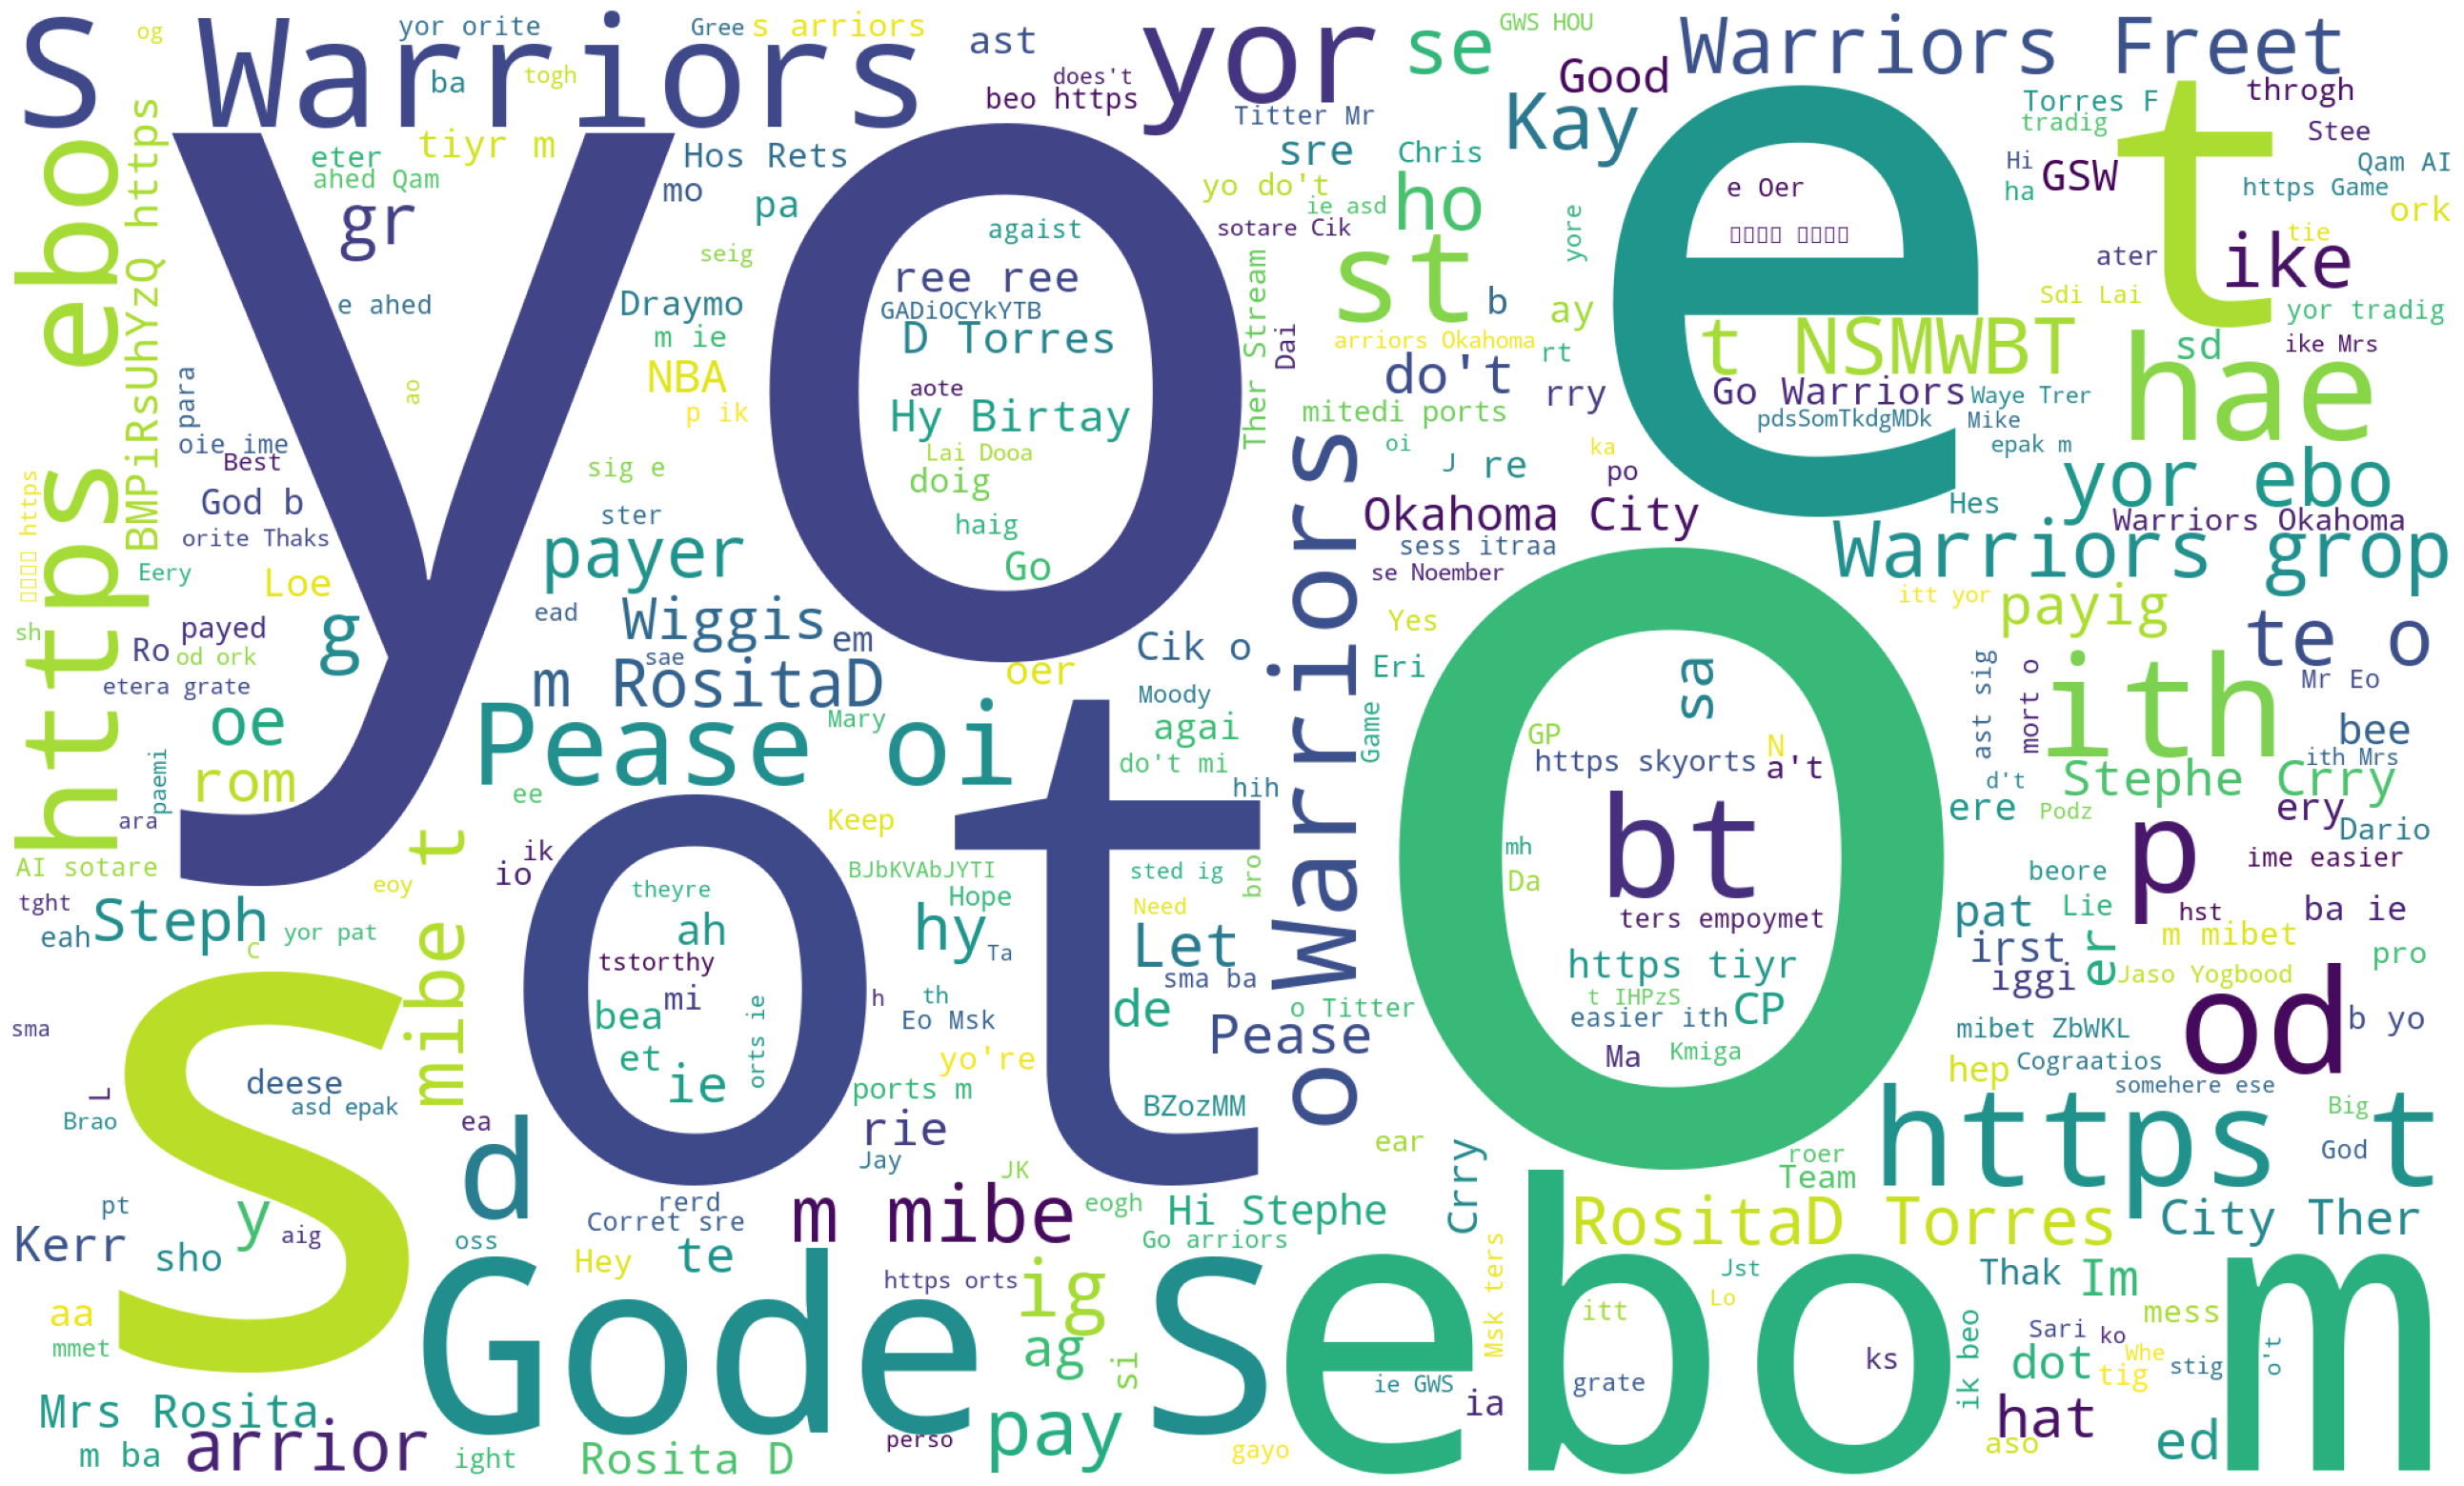

In [ ]:
# import PyPDF2
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()